# Prediksi Diabetes

## Domain Proyek
Domain yang saya gunakan pada project kali ini adalah **Kesehatan**

Ikatan Dokter Anak Indonesia (IDAI) sebelumnya merilis data yang menunjukkan bahwa prevalensi anak penderita diabetes meningkat 70 kali lipat pada Januari 2023 dibanding 2010.

Selain itu, Direktur Utama Badan Penyelenggaraan Jaminan Sosial (BPJS) Kesehatan Ali Ghufron juga mengatakan pasien anak yang menderita diabetes meningkat sekitar 1.000 kasus pada 2022 dibandingkan 2018.

diabetes dikhawatirkan dapat menimbulkan penyakit komplikasi lanjutan seperti Penyakit kardiovaskular, Kerusakan mata (retinopati), Kerusakan saraf (neuropati), kerusakan ginjal, disfungsi seksual, hingga keguguran sebagai komplikasinya.
masalah yang harus diselesaikan ialah bagaimana caranya pasien dapat memprediksi dini penyakit diabetes yang dideritanya guna mengurangi penyakit komplikasi lanjutan tersebut


<br>

## Business Understanding

### Problem Statements
1. Bagaimana Pengaruh kadar gula,tekanan darah, ketebalan kulit terhadap penderita diabetes?
2. bagaimana pengaruh berat badan terhadap penderita diabetes?
3. bagaimana pengaruh ibu hamil terhadap penderita diabetes?

### Goals
1. mengetahui hubungan kadar gula, tekanan darah, dan ketebalan kulit terhadap penyakit diabetes
2. mengetahui pengaruh berat badan terhadap resiko terkena penyakit diabetes
3. mengetahui resiko terkena penyakit diabetes ketika hamil

### Solution statements
solusi yang akan dilakukan adalah dengan menerapkan 2 algoritma machine learning yakni:
* **KNN**
* **Random Forest**

**Algoritma K-Nearest Neighbor (KNN)** merupakan algoritma machine learning sederhana dan mudah diterapkan yang dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Algoritma ini termasuk dalam jenis supervised learning.
KNN adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat.


**Random Forest** adalah algoritma dalam machine learning yang digunakan untuk pengklasifikasian data set dalam jumlah besar. Karena fungsinya bisa digunakan untuk banyak dimensi dengan berbagai skala dan performa yang tinggi. Klasifikasi ini dilakukan melalui penggabungan tree dalam decision tree dengan cara training dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
diabetes = pd.read_csv("/content/drive/MyDrive/Bangkit 2023/diabetes-prediction/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Data Understanding
Dataset yang akan digunakan pada project kali ini adalah dataset [Diabetes](https://www.kaggle.com/datasets/johndasilva/diabetes)

### Variabel-variabel pada dataset diabetes adalah sebagai berikut:
- pregrancies = jumlah kehamilan yang terjadi
- glucose = kadar gula pasien, yang normalnya berada diantara 80 dan 120 mg/dl
- BloodPressure = tekanan darah pasien
- SkinThickness = ketebalan kulit (dalam satuan mm)
- insulin = insulin
- BMI = Body Mass Index biasa digunakan untuk mendeteksi obesitas
- Diabetes Pedigree Function (DPF) = untuk menentukan kemungkinan diabetes pada seseorang berdasarkan riwayat keluarganya.
- Age = Usia

In [4]:
diabetes.shape

(2000, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


### Handling Outliers

In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Pregnancies'>

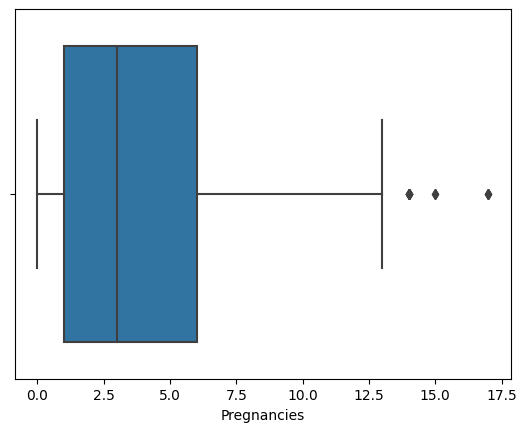

In [8]:
sns.boxplot(x=diabetes['Pregnancies'])

<Axes: xlabel='Glucose'>

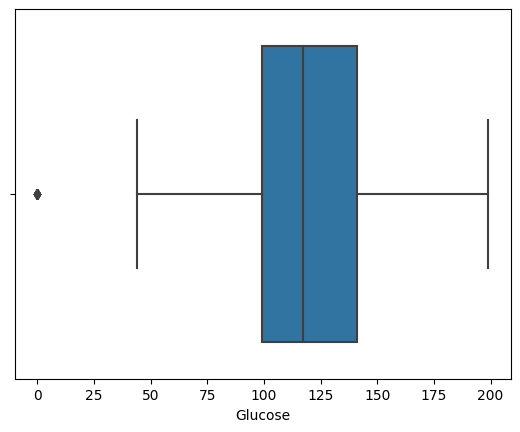

In [9]:
sns.boxplot(x=diabetes['Glucose'])

<Axes: xlabel='BloodPressure'>

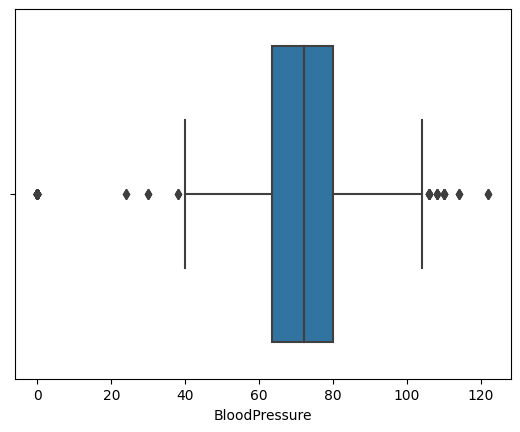

In [10]:
sns.boxplot(x=diabetes['BloodPressure'])

<Axes: xlabel='SkinThickness'>

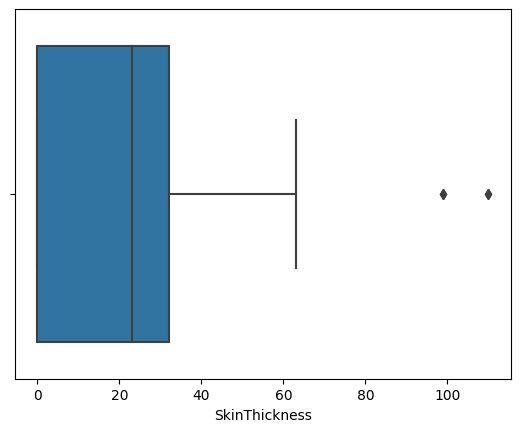

In [11]:
sns.boxplot(x=diabetes['SkinThickness'])

<Axes: xlabel='Insulin'>

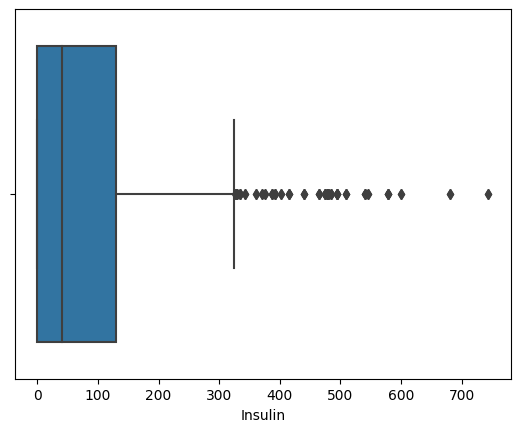

In [12]:
sns.boxplot(x=diabetes['Insulin'])

<Axes: xlabel='BMI'>

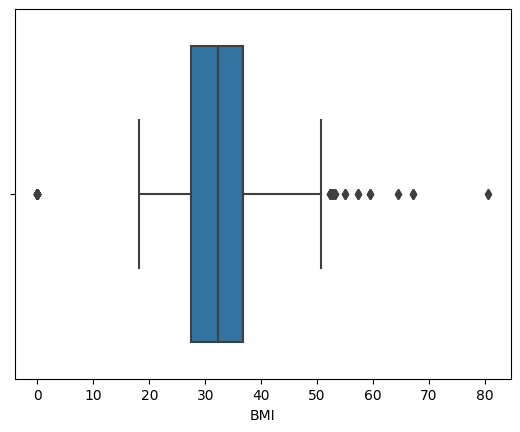

In [13]:
sns.boxplot(x=diabetes['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction'>

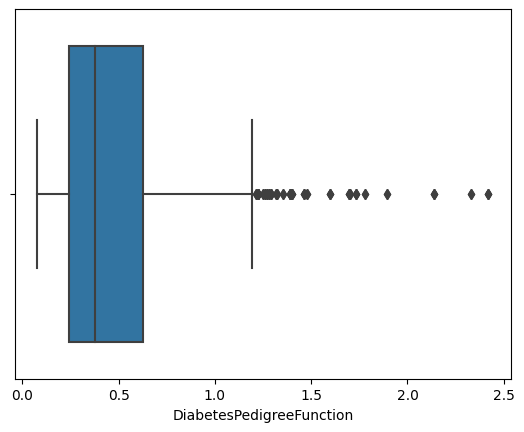

In [14]:
sns.boxplot(x=diabetes['DiabetesPedigreeFunction'])

<Axes: xlabel='Age'>

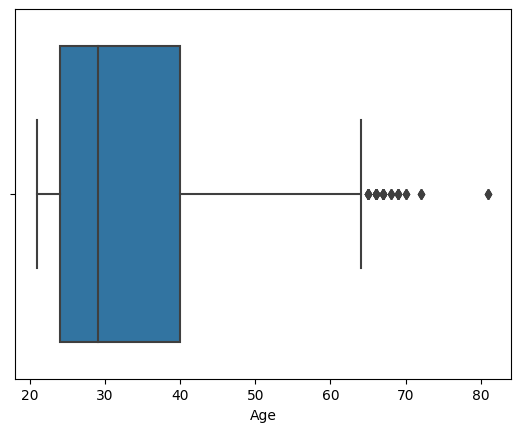

In [15]:
sns.boxplot(x=diabetes['Age'])

In [16]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR=Q3-Q1
diabetes=diabetes[~((diabetes<(Q1-1.5*IQR))|(diabetes>(Q3+1.5*IQR))).any(axis=1)]

# checking dataset after droping outliers
diabetes.shape

(1652, 9)

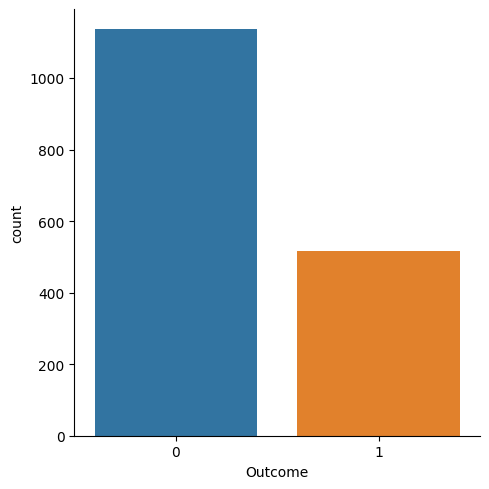

In [17]:
sns.catplot(x="Outcome",data=diabetes, kind="count");

## Univariate Analysis

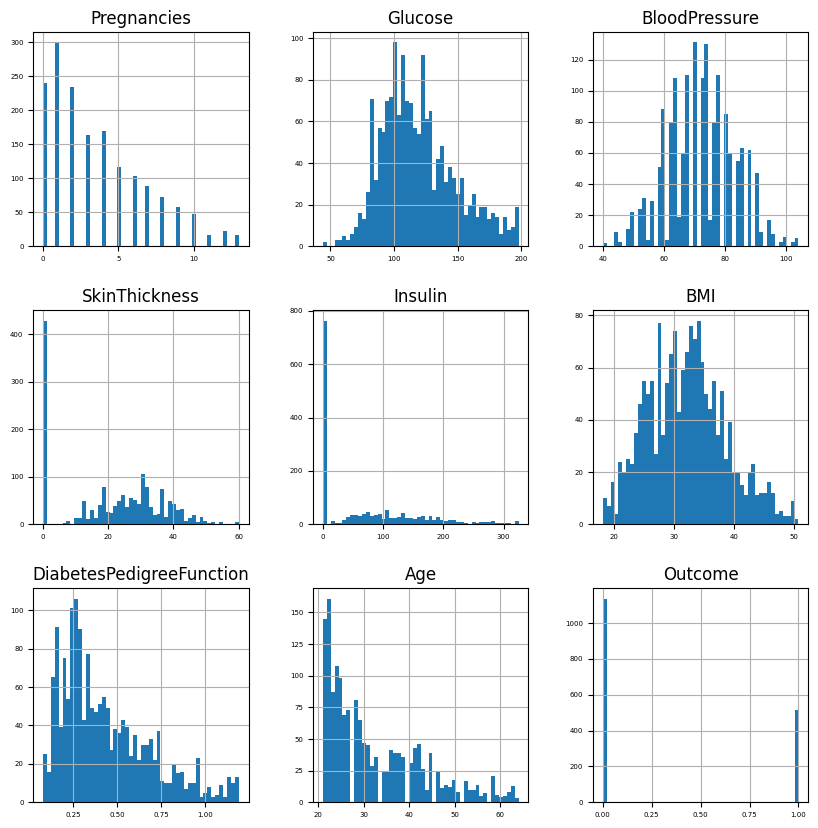

In [18]:
diabetes.hist(figsize=(10,10),bins=50, xlabelsize=5, ylabelsize=5)
plt.show()

## Multivariate Analysis

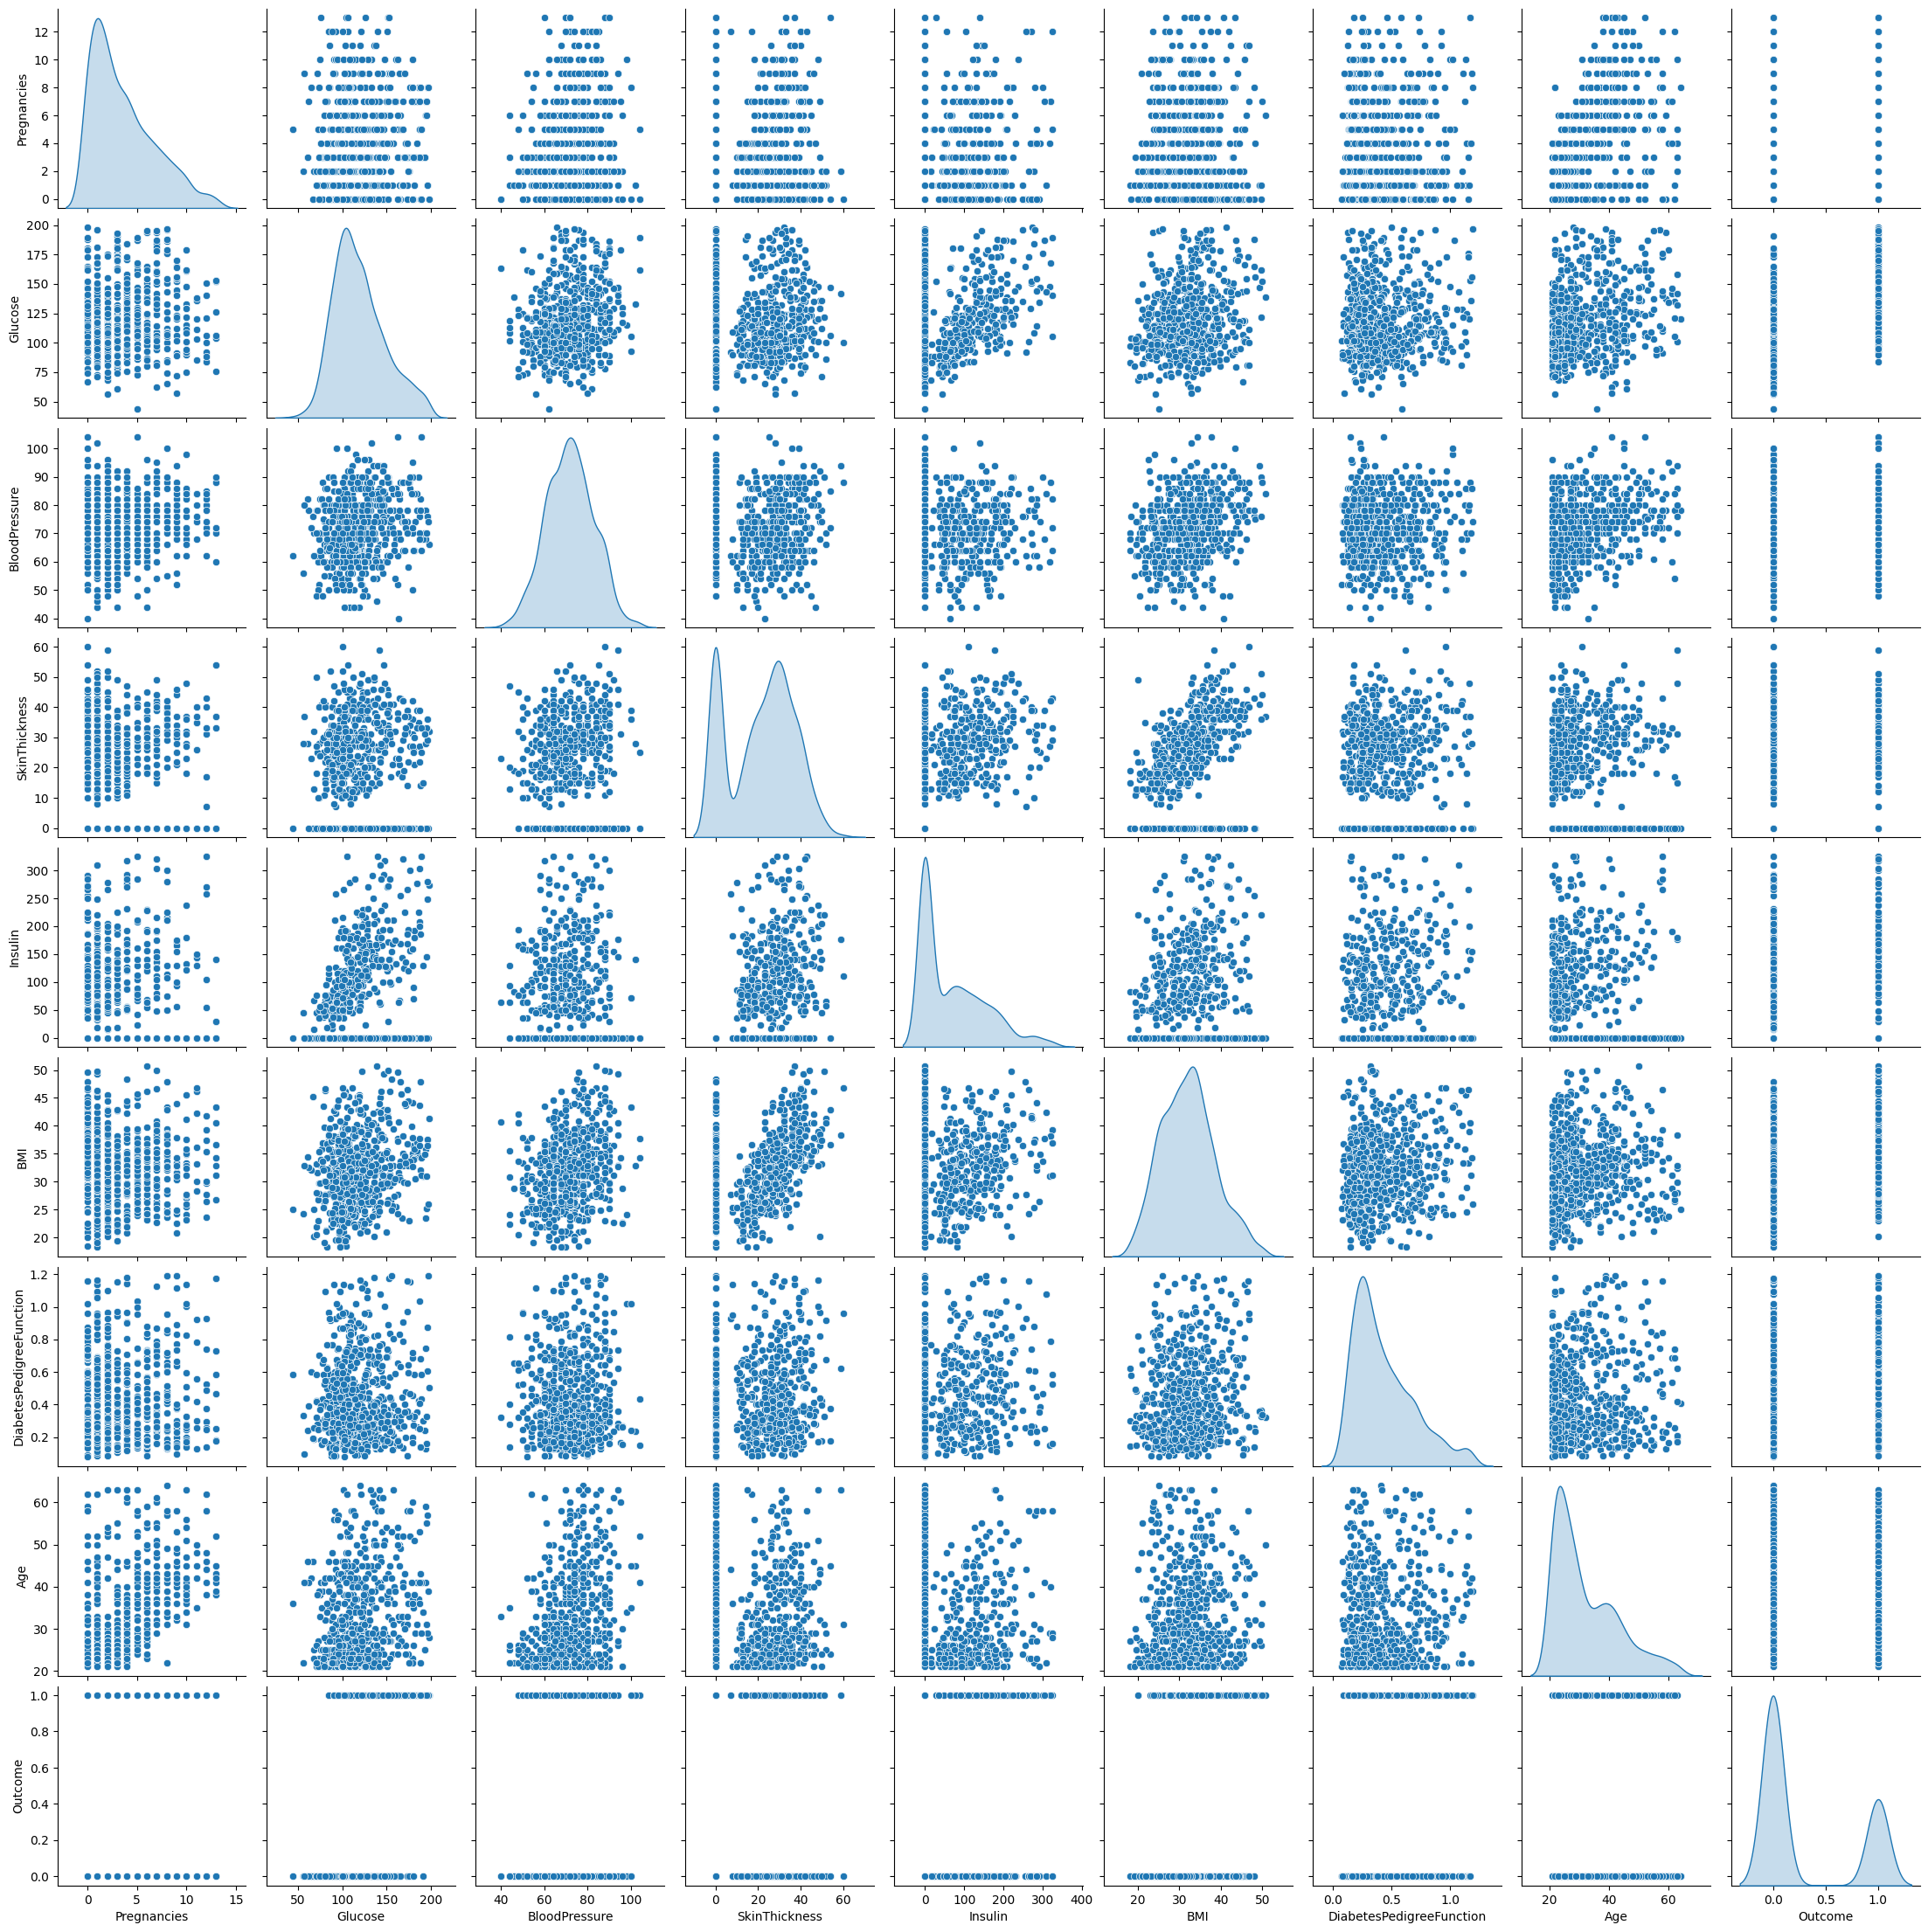

In [19]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diabetes, diag_kind = 'kde')

In [20]:
correlations = diabetes.corr(method = 'pearson')
type(correlations)
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129555,0.179576,-0.072532,-0.105340,0.023464,0.030097,0.563386,0.231507
Glucose,0.129555,1.000000,0.218666,0.033417,0.277608,0.187645,0.060375,0.267651,0.502719
BloodPressure,0.179576,0.218666,1.000000,0.076424,-0.031762,0.278430,0.040277,0.339407,0.186566
SkinThickness,-0.072532,0.033417,0.076424,1.000000,0.482447,0.421690,0.132126,-0.074644,0.037125
Insulin,-0.105340,0.277608,-0.031762,0.482447,1.000000,0.211643,0.220139,-0.043675,0.102023
BMI,0.023464,0.187645,0.278430,0.421690,0.211643,1.000000,0.134688,0.065127,0.250704
DiabetesPedigreeFunction,0.030097,0.060375,0.040277,0.132126,0.220139,0.134688,1.000000,0.058100,0.152782
Age,0.563386,0.267651,0.339407,-0.074644,-0.043675,0.065127,0.058100,1.000000,0.298185
Outcome,0.231507,0.502719,0.186566,0.037125,0.102023,0.250704,0.152782,0.298185,1.000000


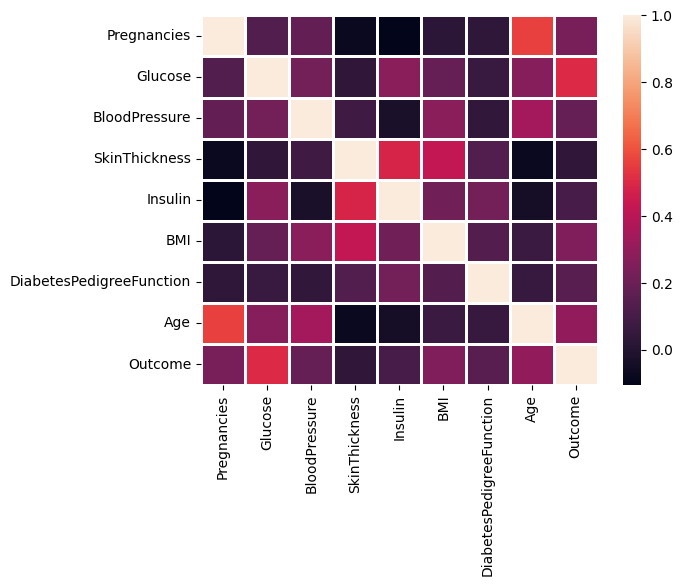

In [21]:
sns.heatmap(diabetes.corr(), linewidths = 1);

## Data Preparation
dalam tahap data preparation ini dilakukan
1. Train test split

    pada tahapan ini, kolom "Outcome" dijadikan target yang akan diprediksi.

    10% dari data akan digunakan sebagai data uji, sedangkan 90% akan digunakan sebagai data latih.
2. **GridSearchCV** untuk menemukan parameter terbaik

    **GridSearchCV** adalah sebuah metode yang digunakan untuk melakukan pencarian parameter terbaik dalam sebuah model atau algoritma dengan menggunakan metode grid search.

    Grid search adalah sebuah teknik yang digunakan untuk mencari kombinasi parameter terbaik yang menghasilkan performa atau skor model yang optimal.

### Train test split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error

X = diabetes.drop(["Outcome"],axis =1)
y = diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

### GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
models = [
    {
        'name': 'KNN',
        'model':KNeighborsClassifier() ,
        'parameters': {
            'n_neighbors': range(1,20)
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'parameters': {
            'n_estimators': [10, 500, 1000],
            'max_depth': [2, 5, 8]
        }
    }
]

In [25]:
for model in models:
    grid_search = GridSearchCV(estimator=model['model'], param_grid=model['parameters'], cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best parameters for {model['name']}: {best_params}")
    print(f"Best score for {model['name']}: {best_score}\n")

Best parameters for KNN: {'n_neighbors': 1}
Best score for KNN: 0.9643323616477979

Best parameters for Random Forest: {'max_depth': 8, 'n_estimators': 1000}
Best score for Random Forest: 0.9226131561702031



## Modeling


### Algoritma
Algortima yang digunakan pada studi kasus kali ini adalah **K-Nearest Neighbor (KNN)** dan juga **Random Forest** .

* K-Nearest Neighbor(KNN) bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat.pada studi kasus kali ini, saya menggunakan from sklearn.neighbors import KNeighborsClassifier. parameter yang digunakan adalah 'n_neighbors'

    *n_neighbors* = Parameter ini menentukan jumlah tetangga terdekat yang akan digunakan dalam proses klasifikasi atau regresi

* Random Forest bekerja dengan membangun banyak decision tree pada waktu pelatihan. pada studi kasus kali ini saya menggunakan from sklearn.ensemble import RandomForestClassifier. parameter yang digunakan adalah 'n_estimators' dan 'max_depth'

    *n_estimators* = jumlah pohon keputusan yang akan dibangun dalam ensemble Random Forest.

    *max_depth*= kedalaman maksimum setiap pohon keputusan dalam Random Forest.

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9759036144578314

In [28]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.96      0.96      0.96        46

    accuracy                           0.98       166
   macro avg       0.97      0.97      0.97       166
weighted avg       0.98      0.98      0.98       166



### Random Forest

In [29]:
rf = RandomForestClassifier(max_depth=8, n_estimators=1000).fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9397590361445783

In [30]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       120
           1       0.91      0.87      0.89        46

    accuracy                           0.94       166
   macro avg       0.93      0.92      0.92       166
weighted avg       0.94      0.94      0.94       166



## Evaluation

In [31]:
models = [
    knn,
    rf

]


for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 97.5904%
----------------------------
RandomForestClassifier:
Accuracy: 93.9759%


<ipython-input-32-a7e41f1f71d8>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-32-a7e41f1f71d8>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


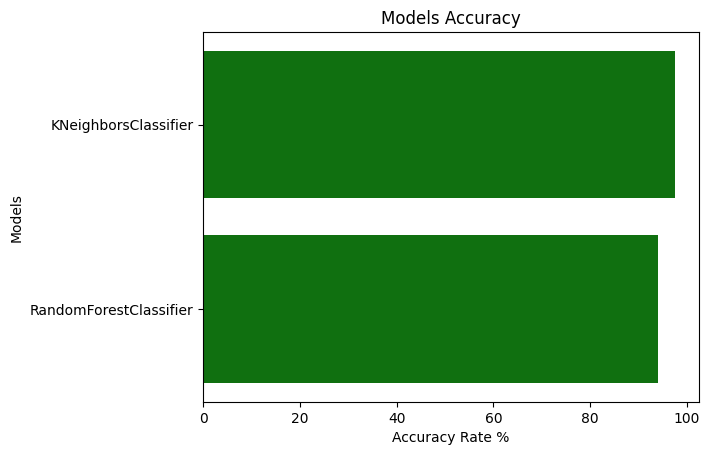

In [32]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[name, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)


sns.barplot(x= 'Accuracy', y = 'Models', data=results, color='g')
plt.xlabel('Accuracy Rate %')
plt.title('Models Accuracy');